In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_processing import load_raw_data, create_feature_engineering_pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
main_transactions_df = load_raw_data('data.csv')
xente_definitions_df = load_raw_data('Xente_Variable_Definitions.csv')

print("\n--- Data Loading Summary ---")
print("First 5 rows of Main Transaction Data:")
display(main_transactions_df.head())


print("\nContent of Xente Variable Definitions:")
display(xente_definitions_df)

Loaded data from: c:\Tenx-projects\credit-risk-model\data\raw\data.csv
Loaded data from: c:\Tenx-projects\credit-risk-model\data\raw\Xente_Variable_Definitions.csv

--- Data Loading Summary ---
First 5 rows of Main Transaction Data:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



Content of Xente Variable Definitions:


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [3]:
print("First 5 rows of the main transaction dataset:")
display(main_transactions_df.head())

First 5 rows of the main transaction dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
print("\nDataFrame Info:")
main_transactions_df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fr

In [5]:
print("\nShape of the DataFrame (rows, columns):")
print(main_transactions_df.shape)


Shape of the DataFrame (rows, columns):
(95662, 16)


In [6]:
print("\nColumn names:")
print(main_transactions_df.columns)


Column names:
Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [7]:
print("\nSummary Statistics for Numerical Features:")
display(main_transactions_df.describe())


Summary Statistics for Numerical Features:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



Distributions of Numerical Features:


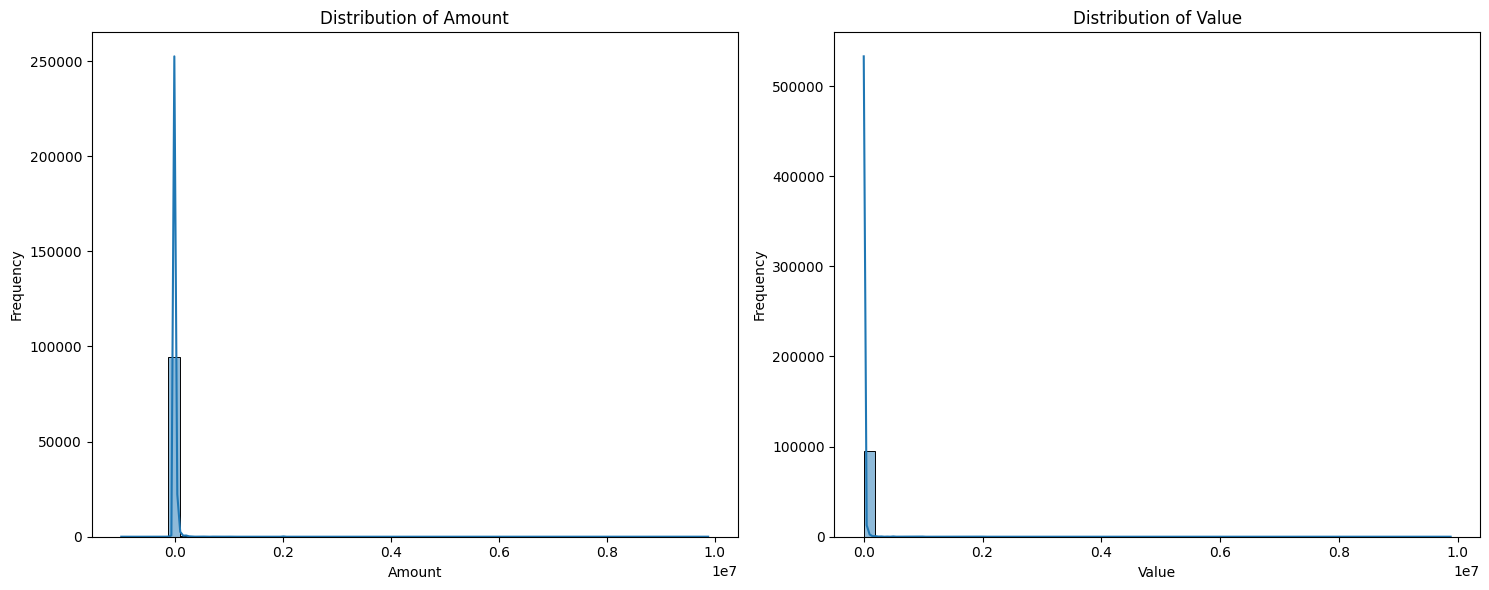

In [8]:
numerical_cols_for_dist = ['Amount', 'Value']

print("\nDistributions of Numerical Features:")
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols_for_dist):
    if col in main_transactions_df.columns:
        plt.subplot(1, len(numerical_cols_for_dist), i + 1)
        sns.histplot(main_transactions_df[col], kde=True, bins=50)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        print(f"Column '{col}' not found for distribution plotting.")

plt.tight_layout()
plt.show()


Distributions of Categorical Features:


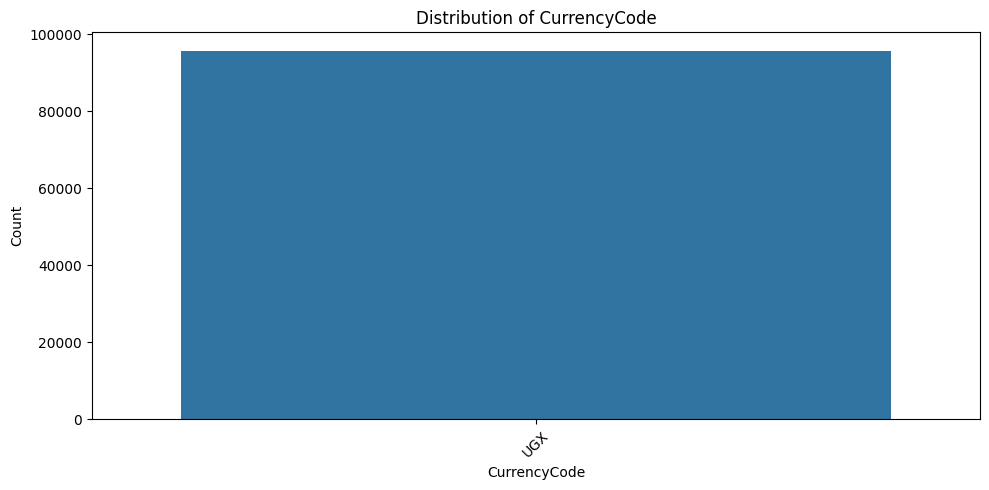

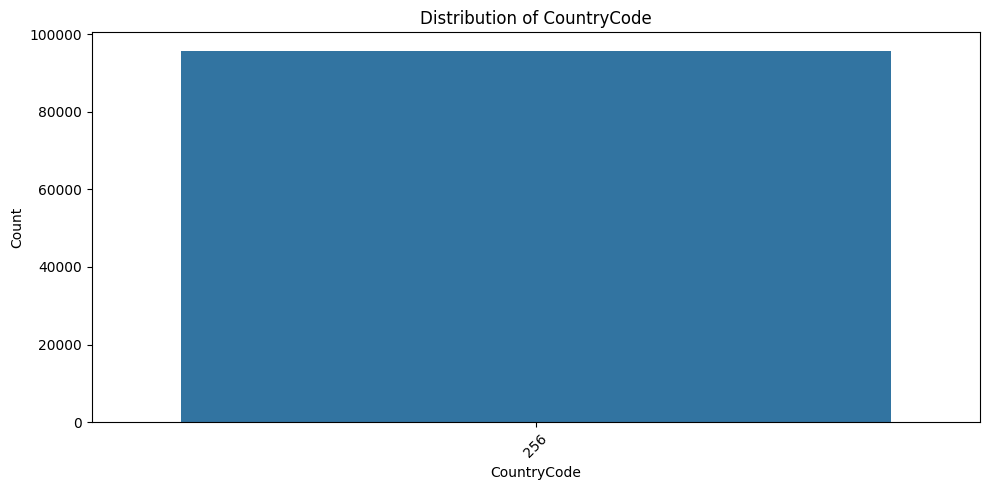

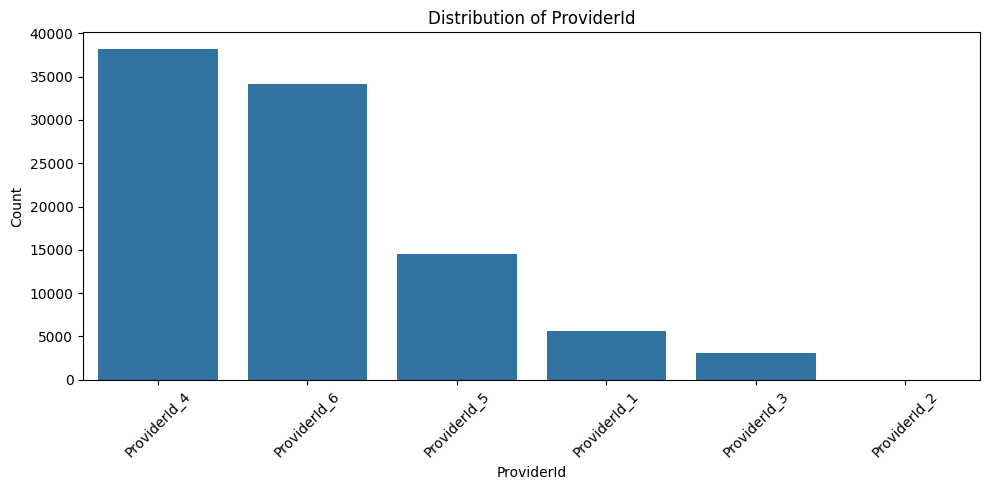

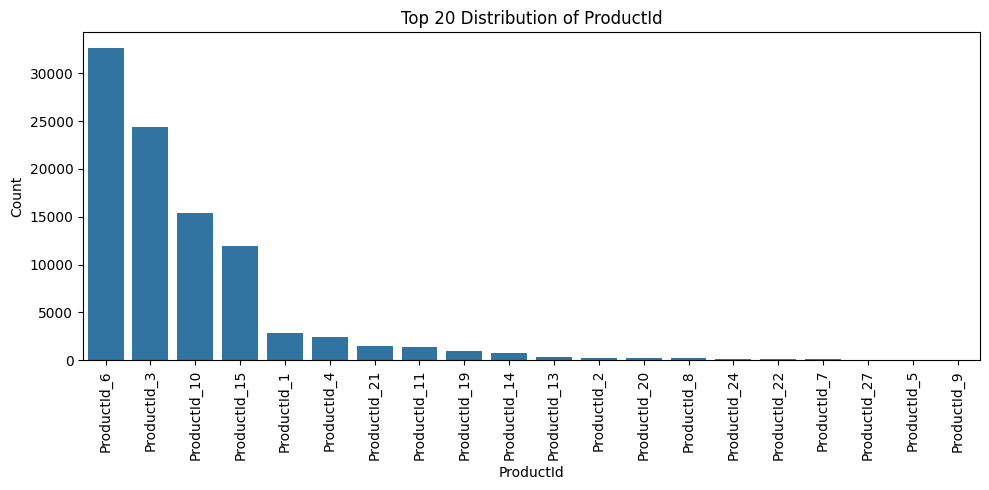

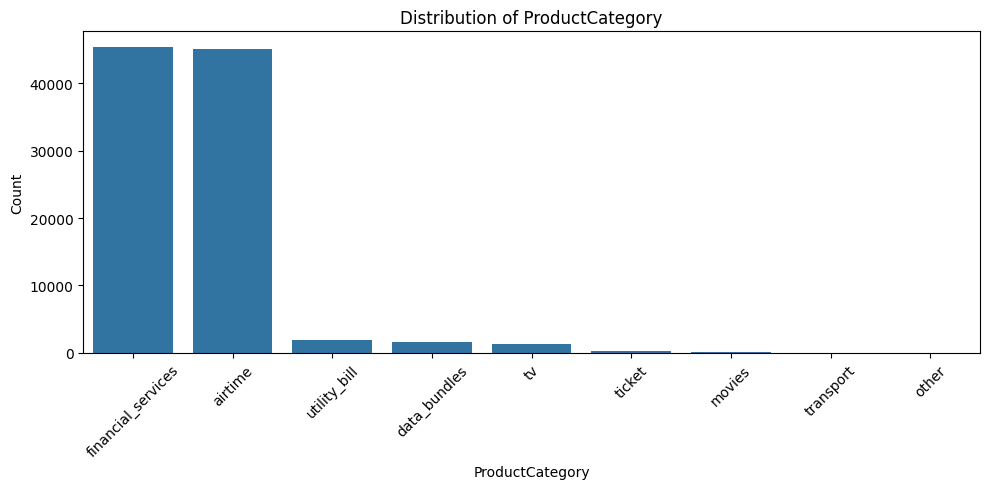

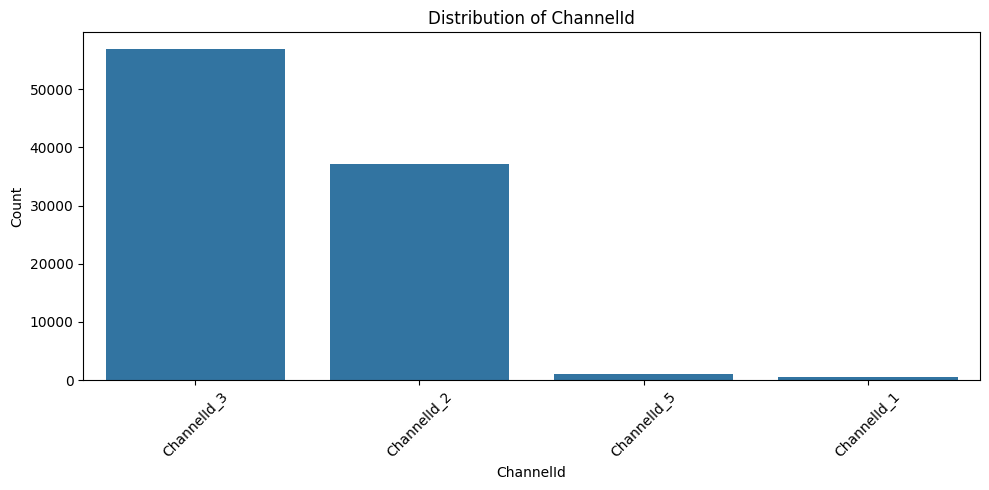

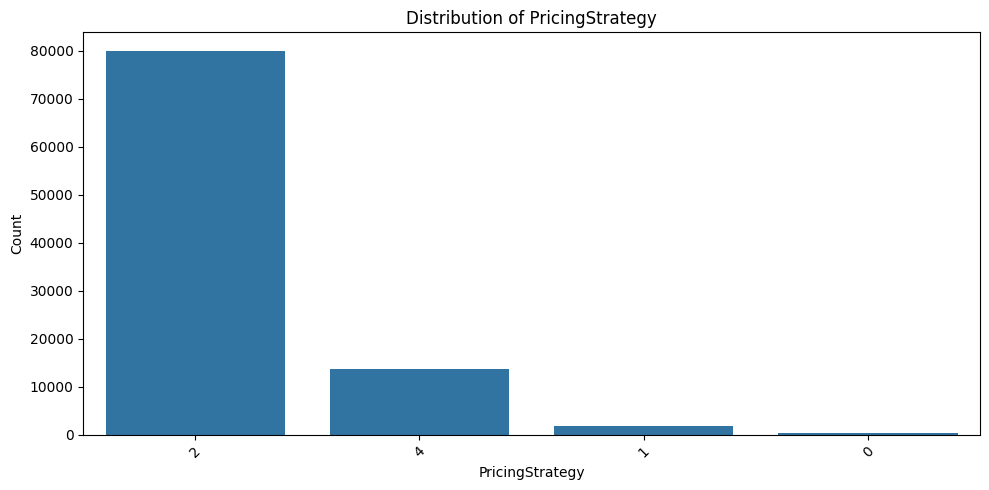

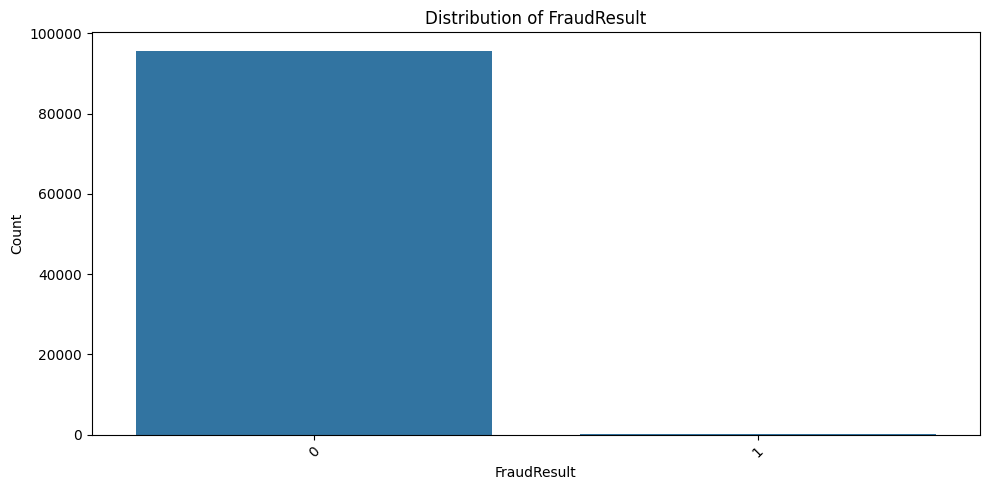

Column 'CreditOrDebit' not found for categorical distribution plotting.
Column 'IsAnonymous' not found for categorical distribution plotting.
Column 'IsDeleted' not found for categorical distribution plotting.
Column 'IsApproved' not found for categorical distribution plotting.


In [9]:
categorical_cols_to_plot = [
    'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
    'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult', 'CreditOrDebit', 'IsAnonymous', 'IsDeleted', 'IsApproved'
]

print("\nDistributions of Categorical Features:")

for col in categorical_cols_to_plot:
    if col in main_transactions_df.columns:
        plt.figure(figsize=(10, 5))
        if main_transactions_df[col].nunique() > 20:
            top_categories = main_transactions_df[col].value_counts().head(20)
            sns.barplot(x=top_categories.index, y=top_categories.values)
            plt.title(f'Top 20 Distribution of {col}')
            plt.xticks(rotation=90)
        else:
            sns.countplot(data=main_transactions_df, x=col, order=main_transactions_df[col].value_counts().index)
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found for categorical distribution plotting.")


Correlation Matrix for Numerical Features:


,Amount,Value
Amount,1.000000,0.989692
Value,0.989692,1.000000


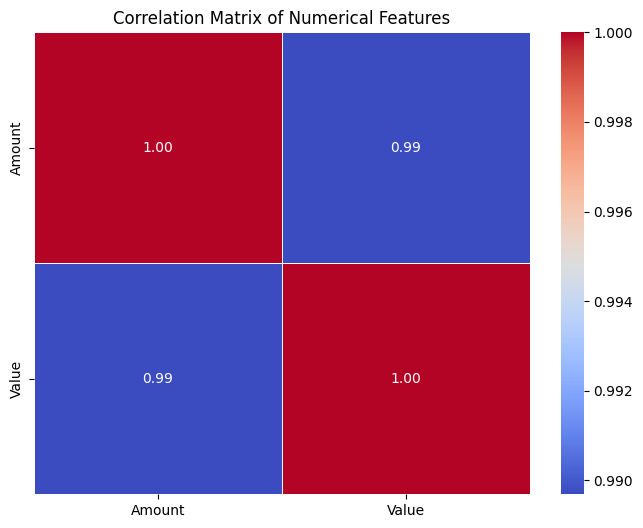

In [10]:
numerical_for_corr = ['Amount', 'Value']

print("\nCorrelation Matrix for Numerical Features:")

if len(numerical_for_corr) > 1 and all(col in main_transactions_df.columns for col in numerical_for_corr):
    corr_matrix = main_transactions_df[numerical_for_corr].corr()
    display(corr_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()
else:
    print("Not enough numerical features or columns not found for correlation analysis.")

In [11]:
print("\nMissing Values Count per Column:")
missing_values_count = main_transactions_df.isnull().sum()
print(missing_values_count)

print("\nMissing Values Percentage per Column:")
missing_percentage = (main_transactions_df.isnull().sum() / len(main_transactions_df)) * 100
print(missing_percentage)

missing_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print("\nColumns with Missing Values (sorted by percentage):")
display(missing_summary[missing_summary['Missing Count'] > 0])


Missing Values Count per Column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Missing Values Percentage per Column:
TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64

Columns with Missing Values (sorte

,Missing Count,Missing Percentage



Outlier Detection using Box Plots for Numerical Features:


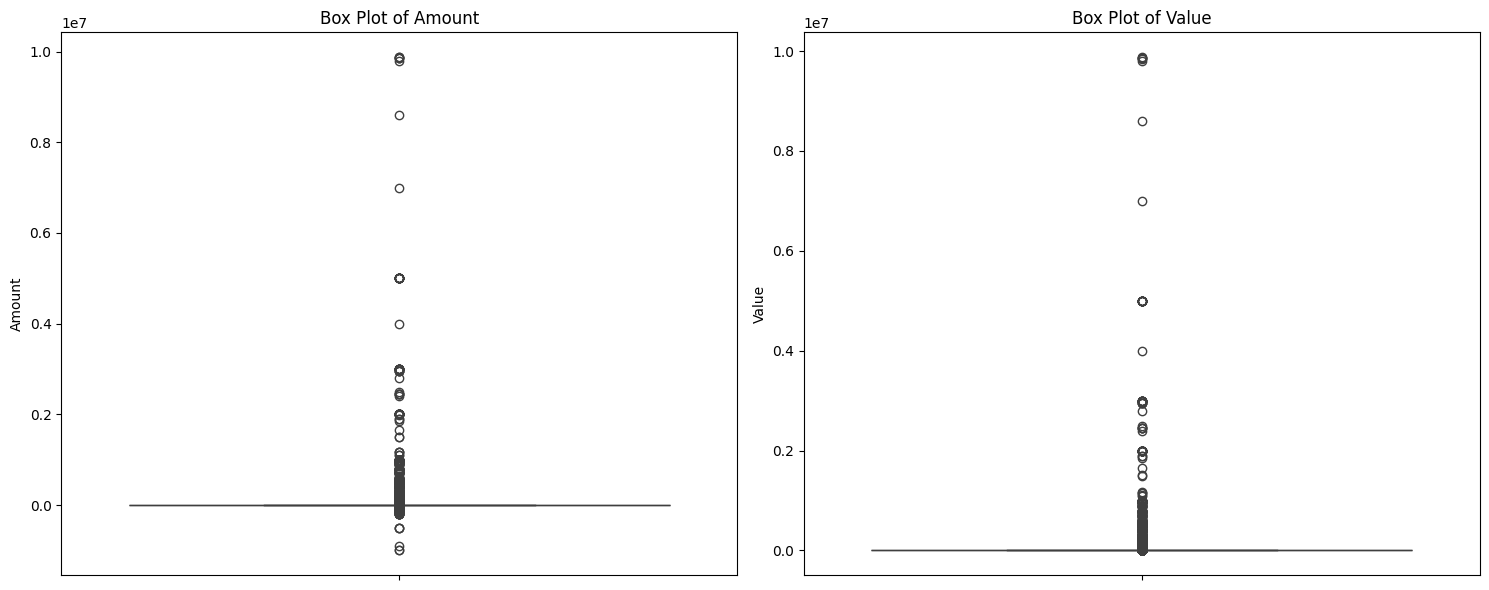

In [12]:
numerical_cols_for_outliers = ['Amount', 'Value']

print("\nOutlier Detection using Box Plots for Numerical Features:")

plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols_for_outliers):
    if col in main_transactions_df.columns:
        plt.subplot(1, len(numerical_cols_for_outliers), i + 1)
        sns.boxplot(y=main_transactions_df[col])
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
    else:
        print(f"Column '{col}' not found for outlier detection.")

plt.tight_layout()
plt.show()

In [13]:
main_transactions_df = load_raw_data('data.csv')
xente_definitions_df = load_raw_data('Xente_Variable_Definitions.csv')

print("\n--- Data Loading Summary ---")
print("First 5 rows of Main Transaction Data:")
display(main_transactions_df.head())

print("\nContent of Xente Variable Definitions:")
display(xente_definitions_df)

Loaded data from: c:\Tenx-projects\credit-risk-model\data\raw\data.csv
Loaded data from: c:\Tenx-projects\credit-risk-model\data\raw\Xente_Variable_Definitions.csv

--- Data Loading Summary ---
First 5 rows of Main Transaction Data:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



Content of Xente Variable Definitions:


,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


In [15]:
feature_pipeline = create_feature_engineering_pipeline()

print("Fitting and transforming data using the feature engineering pipeline...")

columns_to_keep = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'FraudResult']

intermediate_pipeline = Pipeline(steps=[
    ('datetime_extractor', feature_pipeline.named_steps['datetime_extractor']),
    ('feature_aggregator', feature_pipeline.named_steps['feature_aggregator']),
    ('rfm_calculator', feature_pipeline.named_steps['rfm_calculator']),
    ('risk_profiler', feature_pipeline.named_steps['risk_profiler'])
])

processed_features_df = intermediate_pipeline.fit_transform(main_transactions_df.copy()) # Use a copy

numerical_cols_for_preprocessor = [
    'Amount', 'Value', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear',
    'TransactionDayOfWeek', 'TransactionIsWeekend',
    'Recency', 'Frequency', 'Monetary',
    'TotalTransactionAmount', 'AverageTransactionAmount',
    'TransactionCount', 'StdTransactionAmount', 'MaxTransactionAmount', 'MinTransactionAmount'
]

categorical_cols_for_preprocessor = [
    'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
    'ProductCategory', 'ChannelId', 'PricingStrategy'
]


features_for_preprocessor = numerical_cols_for_preprocessor + categorical_cols_for_preprocessor
data_for_final_preprocessor = processed_features_df[features_for_preprocessor]

transformed_features_array = feature_pipeline.named_steps['final_preprocessor'].fit_transform(data_for_final_preprocessor)
preprocessor_output_names = feature_pipeline.named_steps['final_preprocessor'].get_feature_names_out()

transformed_features_df = pd.DataFrame(transformed_features_array, columns=preprocessor_output_names)
processed_features_df_reset = processed_features_df.reset_index(drop=True)
transformed_features_df_reset = transformed_features_df.reset_index(drop=True)


final_processed_df = pd.concat([
    transformed_features_df_reset,
    processed_features_df_reset[columns_to_keep + ['RFM_Cluster', 'is_high_risk']]
], axis=1)

print("\nShape of final processed data (DataFrame):", final_processed_df.shape)
print("\nFirst 5 rows of final processed data (DataFrame):")
display(final_processed_df.head())

print("\nDistribution of 'is_high_risk' column:")
display(final_processed_df['is_high_risk'].value_counts())

print("\nSample of high-risk customers (is_high_risk = 1):")
display(final_processed_df[final_processed_df['is_high_risk'] == 1].head())

Fitting and transforming data using the feature engineering pipeline...

Shape of final processed data (DataFrame): (95662, 97)

First 5 rows of final processed data (DataFrame):


,num_imputer__Amount,num_imputer__Value,num_imputer__TransactionHour,num_imputer__TransactionDay,num_imputer__TransactionMonth,num_imputer__TransactionYear,num_imputer__TransactionDayOfWeek,num_imputer__TransactionIsWeekend,num_imputer__Recency,num_imputer__Frequency,num_imputer__Monetary,num_imputer__TotalTransactionAmount,num_imputer__AverageTransactionAmount,num_imputer__TransactionCount,num_imputer__StdTransactionAmount,num_imputer__MaxTransactionAmount,num_imputer__MinTransactionAmount,cat_imputer__CurrencyCode,cat_imputer__CountryCode,cat_imputer__ProviderId,cat_imputer__ProductId,cat_imputer__ProductCategory,cat_imputer__ChannelId,cat_imputer__PricingStrategy,num_scaler__Amount,num_scaler__Value,num_scaler__TransactionHour,num_scaler__TransactionDay,num_scaler__TransactionMonth,num_scaler__TransactionYear,num_scaler__TransactionDayOfWeek,num_scaler__TransactionIsWeekend,num_scaler__Recency,num_scaler__Frequency,num_scaler__Monetary,num_scaler__TotalTransactionAmount,num_scaler__AverageTransactionAmount,num_scaler__TransactionCount,num_scaler__StdTransactionAmount,num_scaler__MaxTransactionAmount,num_scaler__MinTransactionAmount,cat_encoder__CurrencyCode_UGX,cat_encoder__CountryCode_256,cat_encoder__ProviderId_ProviderId_1,cat_encoder__ProviderId_ProviderId_2,cat_encoder__ProviderId_ProviderId_3,cat_encoder__ProviderId_ProviderId_4,cat_encoder__ProviderId_ProviderId_5,cat_encoder__ProviderId_ProviderId_6,cat_encoder__ProductId_ProductId_1,cat_encoder__ProductId_ProductId_10,cat_encoder__ProductId_ProductId_11,cat_encoder__ProductId_ProductId_12,cat_encoder__ProductId_ProductId_13,cat_encoder__ProductId_ProductId_14,cat_encoder__ProductId_ProductId_15,cat_encoder__ProductId_ProductId_16,cat_encoder__ProductId_ProductId_19,cat_encoder__ProductId_ProductId_2,cat_encoder__ProductId_ProductId_20,cat_encoder__ProductId_ProductId_21,cat_encoder__ProductId_ProductId_22,cat_encoder__ProductId_ProductId_23,cat_encoder__ProductId_ProductId_24,cat_encoder__ProductId_ProductId_27,cat_encoder__ProductId_ProductId_3,cat_encoder__ProductId_ProductId_4,cat_encoder__ProductId_ProductId_5,cat_encoder__ProductId_ProductId_6,cat_encoder__ProductId_ProductId_7,cat_encoder__ProductId_ProductId_8,cat_encoder__ProductId_ProductId_9,cat_encoder__ProductCategory_airtime,cat_encoder__ProductCategory_data_bundles,cat_encoder__ProductCategory_financial_services,cat_encoder__ProductCategory_movies,cat_encoder__ProductCategory_other,cat_encoder__ProductCategory_ticket,cat_encoder__ProductCategory_transport,cat_encoder__ProductCategory_tv,cat_encoder__ProductCategory_utility_bill,cat_encoder__ChannelId_ChannelId_1,cat_encoder__ChannelId_ChannelId_2,cat_encoder__ChannelId_ChannelId_3,cat_encoder__ChannelId_ChannelId_5,cat_encoder__PricingStrategy_0,cat_encoder__PricingStrategy_1,cat_encoder__PricingStrategy_2,cat_encoder__PricingStrategy_4,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,FraudResult,RFM_Cluster,is_high_risk
0,1000.0,1000.0,2.0,15.0,11.0,2018.0,3.0,0.0,1.0,119.0,109921.75,109921.75,923.712185,119.0,3042.294251,20000.0,-5000.0,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,2,-0.046371,-0.072291,-2.15553,-0.100739,0.848684,-0.994246,-0.006389,-0.510703,-0.746427,-0.311831,0.170118,0.170118,-0.067623,-0.311831,-0.167016,-0.193027,0.163927,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,0,0
1,-20.0,20.0,2.0,15.0,11.0,2018.0,3.0,0.0,1.0,119.0,109921.75,109921.75,923.712185,119.0,3042.294251,20000.0,-5000.0,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,-0.054643,-0.080251,-2.15553,-0.100739,0.848684,-0.994246,-0.006389,-0.510703,-0.746427,-0.311831,0.170118,0.170118,-0.067623,-0.311831,-0.167016,-0.193027,0.163927,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.


Distribution of 'is_high_risk' column:


is_high_risk
0    91571
1     4091
Name: count, dtype: int64


Sample of high-risk customers (is_high_risk = 1):


,num_imputer__Amount,num_imputer__Value,num_imputer__TransactionHour,num_imputer__TransactionDay,num_imputer__TransactionMonth,num_imputer__TransactionYear,num_imputer__TransactionDayOfWeek,num_imputer__TransactionIsWeekend,num_imputer__Recency,num_imputer__Frequency,num_imputer__Monetary,num_imputer__TotalTransactionAmount,num_imputer__AverageTransactionAmount,num_imputer__TransactionCount,num_imputer__StdTransactionAmount,num_imputer__MaxTransactionAmount,num_imputer__MinTransactionAmount,cat_imputer__CurrencyCode,cat_imputer__CountryCode,cat_imputer__ProviderId,cat_imputer__ProductId,cat_imputer__ProductCategory,cat_imputer__ChannelId,cat_imputer__PricingStrategy,num_scaler__Amount,num_scaler__Value,num_scaler__TransactionHour,num_scaler__TransactionDay,num_scaler__TransactionMonth,num_scaler__TransactionYear,num_scaler__TransactionDayOfWeek,num_scaler__TransactionIsWeekend,num_scaler__Recency,num_scaler__Frequency,num_scaler__Monetary,num_scaler__TotalTransactionAmount,num_scaler__AverageTransactionAmount,num_scaler__TransactionCount,num_scaler__StdTransactionAmount,num_scaler__MaxTransactionAmount,num_scaler__MinTransactionAmount,cat_encoder__CurrencyCode_UGX,cat_encoder__CountryCode_256,cat_encoder__ProviderId_ProviderId_1,cat_encoder__ProviderId_ProviderId_2,cat_encoder__ProviderId_ProviderId_3,cat_encoder__ProviderId_ProviderId_4,cat_encoder__ProviderId_ProviderId_5,cat_encoder__ProviderId_ProviderId_6,cat_encoder__ProductId_ProductId_1,cat_encoder__ProductId_ProductId_10,cat_encoder__ProductId_ProductId_11,cat_encoder__ProductId_ProductId_12,cat_encoder__ProductId_ProductId_13,cat_encoder__ProductId_ProductId_14,cat_encoder__ProductId_ProductId_15,cat_encoder__ProductId_ProductId_16,cat_encoder__ProductId_ProductId_19,cat_encoder__ProductId_ProductId_2,cat_encoder__ProductId_ProductId_20,cat_encoder__ProductId_ProductId_21,cat_encoder__ProductId_ProductId_22,cat_encoder__ProductId_ProductId_23,cat_encoder__ProductId_ProductId_24,cat_encoder__ProductId_ProductId_27,cat_encoder__ProductId_ProductId_3,cat_encoder__ProductId_ProductId_4,cat_encoder__ProductId_ProductId_5,cat_encoder__ProductId_ProductId_6,cat_encoder__ProductId_ProductId_7,cat_encoder__ProductId_ProductId_8,cat_encoder__ProductId_ProductId_9,cat_encoder__ProductCategory_airtime,cat_encoder__ProductCategory_data_bundles,cat_encoder__ProductCategory_financial_services,cat_encoder__ProductCategory_movies,cat_encoder__ProductCategory_other,cat_encoder__ProductCategory_ticket,cat_encoder__ProductCategory_transport,cat_encoder__ProductCategory_tv,cat_encoder__ProductCategory_utility_bill,cat_encoder__ChannelId_ChannelId_1,cat_encoder__ChannelId_ChannelId_2,cat_encoder__ChannelId_ChannelId_3,cat_encoder__ChannelId_ChannelId_5,cat_encoder__PricingStrategy_0,cat_encoder__PricingStrategy_1,cat_encoder__PricingStrategy_2,cat_encoder__PricingStrategy_4,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,FraudResult,RFM_Cluster,is_high_risk
1510,-30000.0,30000.0,12.0,16.0,11.0,2018.0,4.0,0.0,29.0,4091.0,-104900000.0,-104900000.0,-25641.652408,4091.0,12952.599898,-5000.0,-200000.0,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,-0.297778,0.163249,-0.092372,0.010834,0.848684,-0.994246,0.530195,-0.510703,0.681201,4.208861,-4.646278,-4.646278,-0.377665,4.208861,-0.055634,-0.239816,-4.08542,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TransactionId_10605,BatchId_137649,AccountId_4249,SubscriptionId_4429,CustomerId_7343,0,1,1
1511,-30000.0,30000.0,12.0,16.0,11.0,2018.0,4.0,0.0,29.0,4091.0,-104900000.0,-104900000.0,-25641.652408,4091.0,12952.599898,-5000.0,-200000.0,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,4,-0.297778,0.163249,-0.092372,0.010834,0.848684,-0.994246,0.530195,-0.510703,0.681201,4.208861,-4.646278,-4.646278,-0.377665,4.208861,-0.055634,-0.239816,-4.08542,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0